In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop(['RowNumber'], axis=1)
display(churn_data)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [285]:
quantative_values = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorial_values = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

# 9.1

**Каково соотношение ушедших и лояльных клиентов?**

In [286]:
clients = churn_data['Exited'].value_counts()
# display(clients)

In [287]:
clients = clients.rename(index={0: 'Лояльные'})
clients = clients.rename(index={1: 'Ушедшие'})
# display(clients)

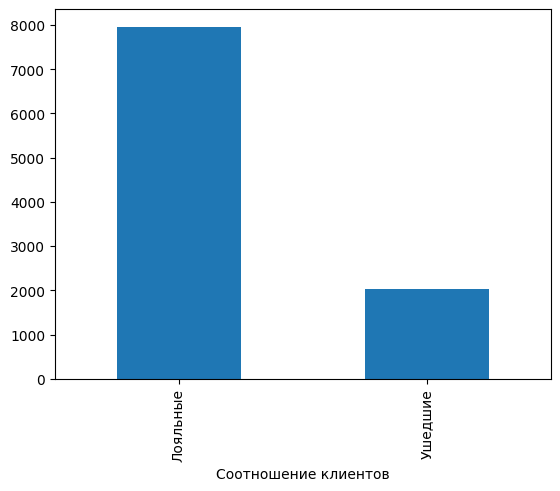

In [288]:
clients.plot(
    kind='bar',
    xlabel='Соотношение клиентов'
);

**<u>Вывод:</u>**

Даже не вдаваясь в точные цифры, а только взглянув на график, мы можем предполоджить, что общее кол-во клиентов около **10,000**. Из них **2,000** - *ушедшие*. Что составляет **20%**.

# 9.2

**Распределение баланса пользователей, у которых на счету больше 2 500 долларов.**

In [289]:
clients_df = churn_data[churn_data['Balance'] > 2500]
# display(clients_df)

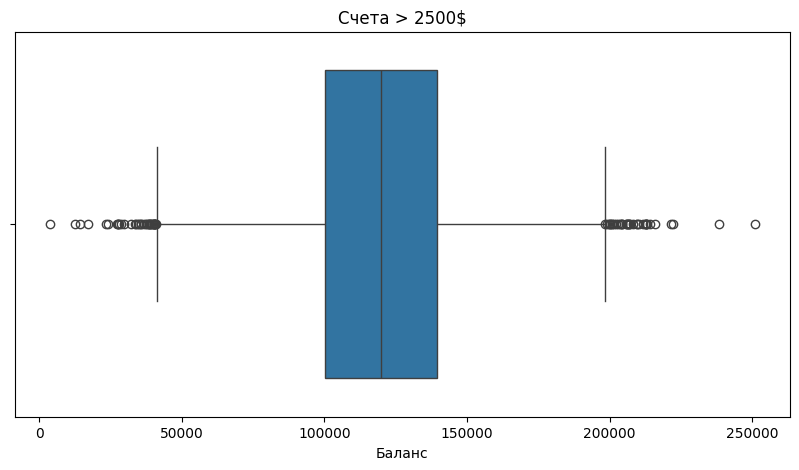

In [290]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.boxplot(
    x=clients_df['Balance'],
    orient='h',
)
ax.set_title('Счета > 2500$')
ax.set_xlabel('Баланс');

**<u>Вывод:</u>**

Данная коробчатая диаграмма позволяет нам увидеть, что баланс у пользователей (у которых на счету > **2,500$**) колеблется от **4,000$** до **200,000$** (ориентировочно). 

Медиана - **120,000$**. 

А 50% пользователей имеют на счетах от **100,000$** до **140,000$**. 

Помимо этого присутствуют многочисленные выбросы, как позитивные (баланс которых > **200,000$**), так и отрицательные (баланс которых < **4,000$**).

# 9.3

**Распределение баланса клиентов в разрезе признака оттока.**

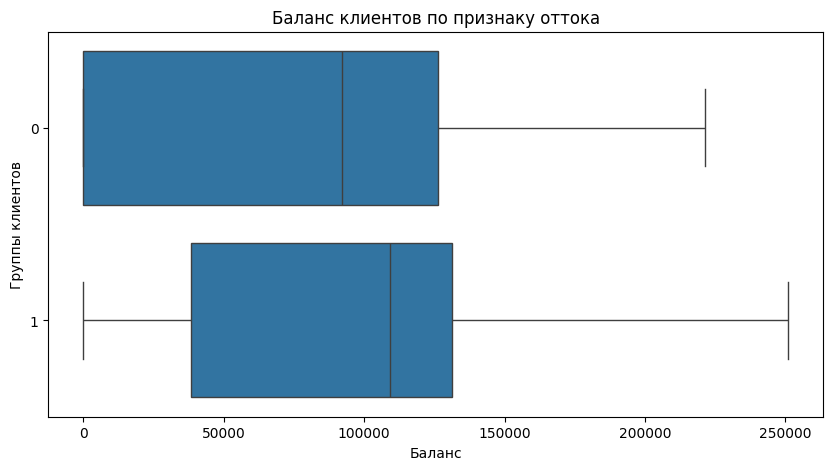

In [291]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.boxplot(
    x=churn_data['Balance'],
    y=churn_data['Exited'],
    orient='h',
)
ax.set_title('Баланс клиентов по признаку оттока')
ax.set_xlabel('Баланс')
ax.set_ylabel('Группы клиентов');

**<u>Вывод:</u>**

На данной диаграмме `0` - *лояльные клиенты*, `1` - *ушедшие клиенты*.

Для группы *лояльных клиентов*:
* Баланс колеблется от **0$** до **220,000$** (ориентировочно). 
* Медиана - **90,000$**. 
* А 50% пользователей имеют на счетах от **0$** до **125,000$**. 

Для группы *ушедших клиентов*:
* Баланс колеблется от **0$** до **250,000$** (ориентировочно). 
* Медиана - **110,000$**. 
* А 50% пользователей имеют на счетах от **40,000$** до **130,000$**. 

Из чего можно сделать вывод, что группа *ушедших клиентов* - это клиенты, у которых на балансе банка суммы больше. Быть может это более состоятельные клиенты, у которых более высокий доход. 

А причиной ухода может быть изменение условий обслуживания банка (падение процента сберегательного счёта) или же наоборот, не измененившиеся условия банка, на ситуацию в мире, в сравнении с другими банками, куда и могли уйти состоятельные клиенты.

# 9.4

**Распределение возраста в разрезе признака оттока.**

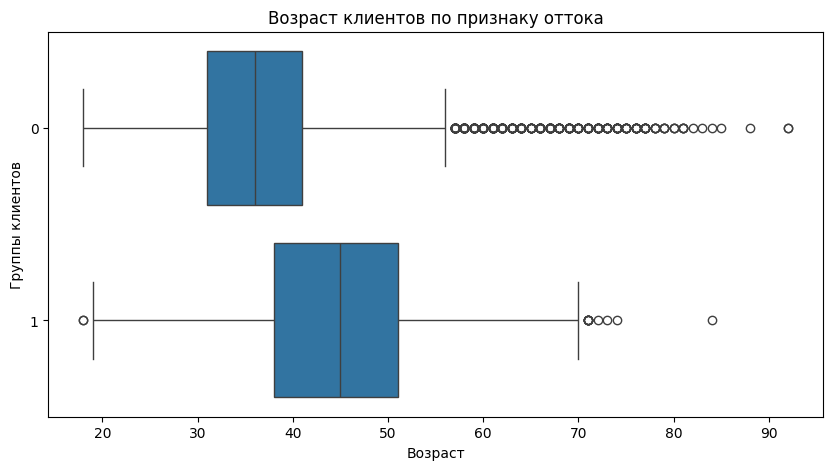

In [292]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.boxplot(
    x=churn_data['Age'],
    y=churn_data['Exited'],
    orient='h',
)
ax.set_title('Возраст клиентов по признаку оттока')
ax.set_xlabel('Возраст')
ax.set_ylabel('Группы клиентов');

**<u>Вывод:</u>**

На данной диаграмме `0` - *лояльные клиенты*, `1` - *ушедшие клиенты*.

Потенциальных выбросов больше в группе *лояльных клиентов*.

Банку стоит обратить внимание на клиентов в возрасте от **38** до **51** года (именно этого возраста были 50% ушедших клиентов).

# 9.5

**Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.**

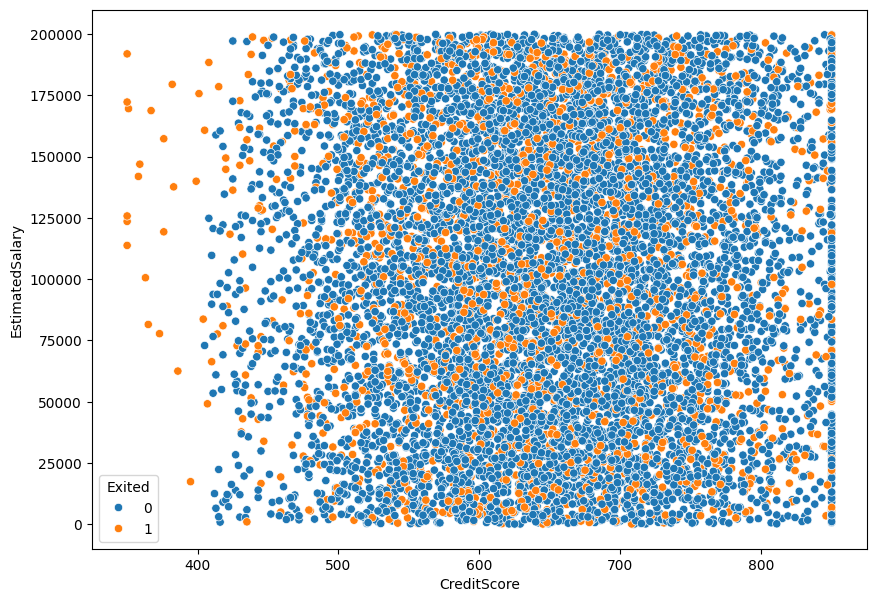

In [293]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.scatterplot(
    data=churn_data,
    x='CreditScore', 
    y='EstimatedSalary', 
    hue='Exited'
);

**<u>Вывод:</u>**

Чёткая взаимосвязь не прослеживается. 

Но видно, что клиенты с рейтингом < 400 принадлежали к группе *ушедших*. У всех *лояльных* клиентов рейтинг выше 400.

# 9.6

**Кто чаще уходит, мужчины или женщины?**

In [294]:
gender = churn_data.groupby('Gender')['Exited'].mean().round(2)
# display(gender)

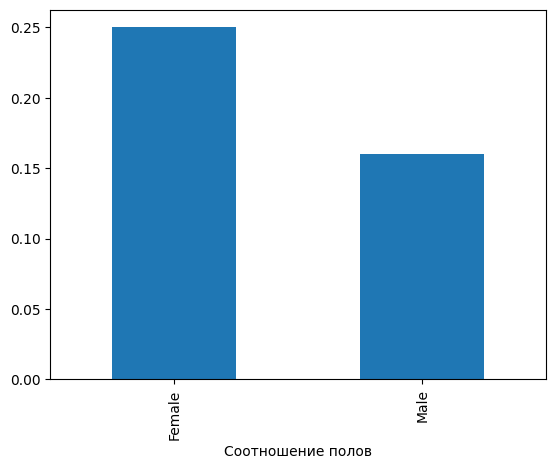

In [295]:
gender.plot(
    kind='bar',
    xlabel='Соотношение полов'
);

**<u>Вывод:</u>**

Если сравнивать внутри каждой группы. То в *женской* группе процент *ушедших* больше.

# 9.7

**Как отток клиентов зависит от числа приобретённых у банка услуг?**

In [296]:
products_df = churn_data.groupby(['Exited', 'NumOfProducts'], as_index=False).count()
products_df = products_df.rename(columns={'CustomerId': 'Count'})
# products_df

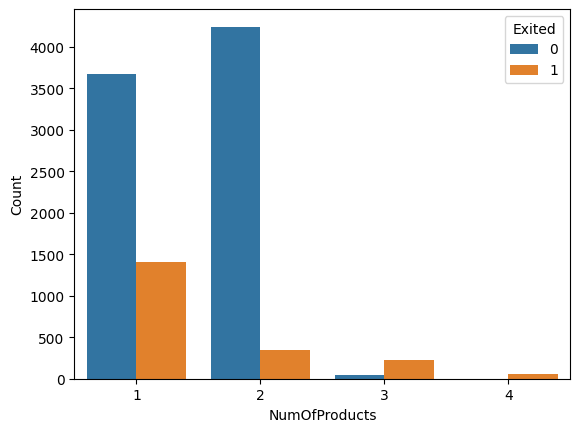

In [297]:
sns.barplot(
    data=products_df,
    x='NumOfProducts',
    y='Count',
    hue='Exited',
);

**<u>Вывод:</u>**

В группе *ушедших клиентов* преимущественно была 1 услуга. 2-3 услуги мало кто преобретал, 4 - ещё меньше.

Можно сделать вывод, что в группе *ушедших клиентов* преимущественно была приобретена 1 услуга банка.

# 9.8

**Как влияет наличие статуса активного клиента на отток клиентов?**

In [298]:
fig = px.histogram(
    churn_data, 
    x='IsActiveMember', 
    color='Exited', 
    barmode='group',
    title='Отток клиентов в зависимости от статуса',
    labels={'IsActiveMember': 'Статус клиента'}
)
fig.show()

**<u>Вывод:</u>**

Отток клиентов больше в группе с *неактивным статусом*.

Банку стоит подумать над привлечением своих *неактивных клиентов*, быть может специальными выгодными условиями для вновь вернувшихся клиентов.

# 9.9

**В какой стране доля ушедших клиентов больше?**

In [312]:
countries_df = churn_data.groupby(
    by='Geography',
    as_index=False
)[['Exited']].mean()

# countries_df

In [300]:
fig = px.choropleth(
    data_frame=countries_df, 
    locations="Geography",
    locationmode = "country names",
    color="Exited",
    range_color=[0, 1],
    title='Отток клиентов на карте',
    width=800,
    height=500,
    color_continuous_scale='Reds'
)

fig.show()

**<u>Вывод:</u>**

Процент *ушедших клиентов* больше всего в *Германии*. Быть может это связано с экономической ситуацией внутри страны.

# 9.10

In [301]:
def get_credit_score_cat(credit_score):
        if credit_score >= 300 and credit_score < 500:
            return "Very_Poor"
        elif credit_score >= 500 and credit_score < 601:
            return "Poor"
        elif credit_score >= 601 and credit_score < 661:
            return "Fair"
        elif credit_score >= 661 and credit_score < 781:
            return "Good"
        elif credit_score >= 781 and credit_score < 851:
            return "Excellent"
        elif credit_score >= 851:
            return "Top"
        elif credit_score < 300:
            return "Deep"

In [313]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
# churn_data

In [314]:
pivot = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)
# pivot

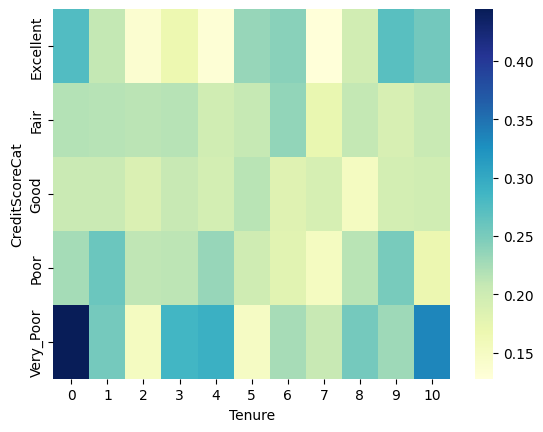

In [316]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')

**<u>Вывод:</u>**

Чаще всего уходят клиенты категории `'Very_poor'` не пробывшие в банке более года.